Projeto Portifólio - Part 2 ( PySpark)

Antes de iniciar a mão na massa, eu observei o csv dentro do próprio EXCEL para verificar como eu poderia estar modelando este arquivo.

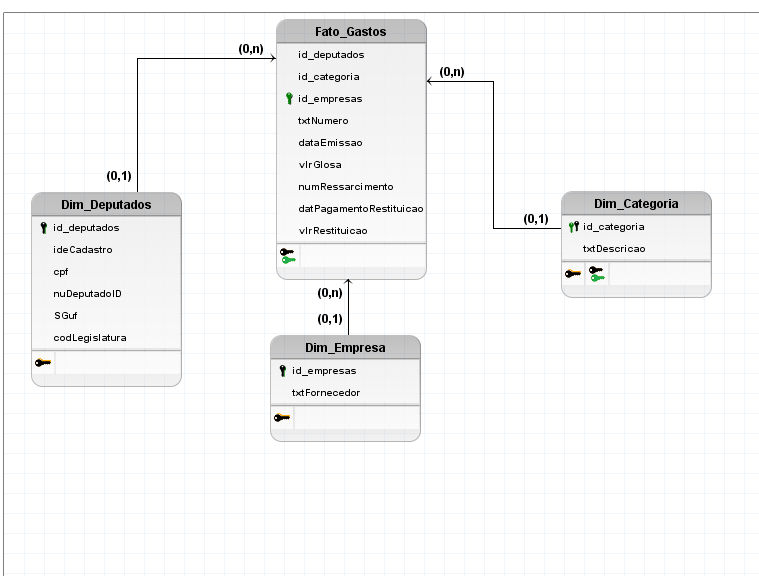

Agora Seguimos para utilização do spark

# Reconhecendo o arquivo Ano-2023.csv

In [1]:
# Instalando o pyspark
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=a9eeaf5c0033d177016724bbbf9ecd40b2eb702f0ca9802e37ce38dbeed3c41c
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [2]:
# Importando Spark e suas funções
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum, monotonically_increasing_id, count

In [3]:
# Iniciando Sessão Spark
spark = SparkSession.builder.appName("VerificandoGastos").getOrCreate()

In [4]:
# Visualizando Spark
spark

In [5]:
# Carregando Arquivos
gastos = spark.read.csv('Ano-2023.csv', sep=';', header=True)

In [6]:
# Verificando quantidade de Registros
gastos.count()

159746

In [7]:
# Verificando visualmente os dados
gastos.limit(20).toPandas()

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,...,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,datPagamentoRestituicao,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
0,LID.GOV-CD,None,None,None,2023,NA,None,57,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,...,0,None,None,1911524,None,None,None,2812,7503781,https://www.camara.leg.br/cota-parlamentar/doc...
1,LID.GOV-CD,None,None,None,2023,NA,None,57,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,...,0,None,None,1948548,None,None,None,2812,7570656,https://www.camara.leg.br/cota-parlamentar/doc...
2,LID.GOV-CD,None,None,None,2023,NA,None,57,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,...,0,None,None,1954294,None,None,None,2812,7580960,https://www.camara.leg.br/cota-parlamentar/doc...
3,LID.GOV-CD,None,None,None,2023,NA,None,57,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,...,0,None,None,1963418,None,None,None,2812,7599444,https://www.camara.leg.br/cota-parlamentar/doc...
4,LID.GOV-CD,None,None,None,2023,NA,None,57,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,...,0,None,None,1975208,None,None,None,2812,7620412,https://www.camara.leg.br/cota-parlamentar/doc...
5,LID.GOV-CD,None,None,None,2023,NA,None,57,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,...,0,None,None,1922139,None,None,None,2812,7522817,https://www.camara.leg.br/cota-parlamentar/doc...
6,LID.GOV-CD,None,None,None,2023,NA,None,57,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,...,0,None,None,1928655,None,None,None,2812,7534930,https://www.camara.leg.br/cota-parlamentar/doc...
7,LID.GOV-CD,None,None,None,2023,NA,None,57,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,...,0,None,None,1939355,None,None,None,2812,7553911,https://www.camara.leg.br/cota-parlamentar/doc...
8,LID.GOV-CD,None,None,None,2023,NA,None,57,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,...,0,None,None,1914685,None,None,None,2812,7509632,https://www.camara.leg.br/cota-parlamentar/not...
9,LID.GOV-CD,None,None,None,2023,NA,None,57,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,...,0,None,None,1959098,None,None,None,2812,7591098,https://www.camara.leg.br/cota-parlamentar/not...


In [8]:
# Verificando Esquema
gastos.printSchema()

root
 |-- txNomeParlamentar: string (nullable = true)
 |-- cpf: string (nullable = true)
 |-- ideCadastro: string (nullable = true)
 |-- nuCarteiraParlamentar: string (nullable = true)
 |-- nuLegislatura: string (nullable = true)
 |-- sgUF: string (nullable = true)
 |-- sgPartido: string (nullable = true)
 |-- codLegislatura: string (nullable = true)
 |-- numSubCota: string (nullable = true)
 |-- txtDescricao: string (nullable = true)
 |-- numEspecificacaoSubCota: string (nullable = true)
 |-- txtDescricaoEspecificacao: string (nullable = true)
 |-- txtFornecedor: string (nullable = true)
 |-- txtCNPJCPF: string (nullable = true)
 |-- txtNumero: string (nullable = true)
 |-- indTipoDocumento: string (nullable = true)
 |-- datEmissao: string (nullable = true)
 |-- vlrDocumento: string (nullable = true)
 |-- vlrGlosa: string (nullable = true)
 |-- vlrLiquido: string (nullable = true)
 |-- numMes: string (nullable = true)
 |-- numAno: string (nullable = true)
 |-- numParcela: string (null

In [9]:
# Verificando registros nulos
gastos.select([sum(col(col_name).isNull().cast('int')).alias(col_name) for col_name in gastos.columns]).toPandas()

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,...,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,datPagamentoRestituicao,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
0,0,663,615,619,4,0,615,4,4,4,...,4,123246,123369,8,121069,159689,159689,8,8,43456


In [10]:
# Filtrando apenas legislatura 2023
gastos = gastos.where('nuLegislatura == "2023"')
gastos.count()

146539

In [11]:
# Verificando registros nulos
gastos.select([sum(col(col_name).isNull().cast('int')).alias(col_name) for col_name in gastos.columns]).toPandas()

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,...,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,datPagamentoRestituicao,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
0,0,622,592,592,0,0,592,0,0,0,...,0,113395,113505,4,112702,146483,146483,4,4,38092


## Criando Dimensão Deputados

In [12]:
# Criando DF deputados
deputados = gastos.select('ideCadastro','txNomeParlamentar','cpf','nuDeputadoId','sgUF','codLegislatura')
deputados.printSchema()

root
 |-- ideCadastro: string (nullable = true)
 |-- txNomeParlamentar: string (nullable = true)
 |-- cpf: string (nullable = true)
 |-- nuDeputadoId: string (nullable = true)
 |-- sgUF: string (nullable = true)
 |-- codLegislatura: string (nullable = true)



In [13]:
# Contados Registros
deputados.count()

146539

In [14]:
# Removendo Duplicados
deputados = deputados.dropDuplicates()
deputados.count()

570

In [15]:
# Criando ID
deputados = deputados.withColumn('id_deputados', monotonically_increasing_id())
# Reordenando colunas
deputados = deputados.select('id_deputados','ideCadastro','txNomeParlamentar','cpf','nuDeputadoId','sgUF','codLegislatura')
deputados.limit(20).toPandas()

,id_deputados,ideCadastro,txNomeParlamentar,cpf,nuDeputadoId,sgUF,codLegislatura
0,0,143632,Domingos Neto,02827898390,2329,CE,57
1,1,178993,Carlos Henrique Gaguim,21944202153,3023,TO,57
2,2,204394,Gervásio Maia,88623327420,3401,PB,57
3,3,116379,Darci de Matos,44828624953,3217,SC,57
4,4,204360,Silvia Cristina,01739396782,3278,RO,57
5,5,74398,Maria do Rosário,48989371015,1605,RS,57
6,6,204408,Gustinho Ribeiro,82706522534,3317,SE,57
7,7,73778,Luiz Carlos Hauly,08682607972,824,PR,57
8,8,74848,Jandira Feghali,43428169700,733,RJ,57
9,9,204441,Otoni de Paula,07217877709,3246,RJ,57


## Criando Dimensão Empresas

In [16]:
# Criando DF de Empresas
empresas =  gastos.select('txtFornecedor')
empresas.count()

146539

In [17]:
# Removendo Registros duplicados
empresas = empresas.dropDuplicates()
empresas.count()

18298

In [18]:
# Verificando Nulos
empresas.select([sum(col(col_name).isNull().cast('int')).alias(col_name) for col_name in empresas.columns]).toPandas()

,txtFornecedor
0,0


In [19]:
# Criando coluna de ID
empresas = empresas.withColumn('id', monotonically_increasing_id())
empresas.toPandas()

,txtFornecedor,id
0,EIXINHO L 212 NORTE COM DE COM E DERIV LTDA,0
1,GM RIBEIRO DA COSTA RESTAURANTE,1
2,CAREN ROQUE FLORET,2
3,AUTO POSTO CHEGADA LTDA,3
4,EMPORIO RESTAURANTE E CAFE EIRELI,4
...,...,...
18293,ITS TELECOMUNICACOES LTDA,18293
18294,AUTO POSTO TERERE LTDA,18294
18295,J D L SEM CORTES LTDA,18295
18296,AUTO POSTO UNIAO LTDA,18296


In [20]:
# Reordenando colunas e valores
empresas = empresas.select('id','txtFornecedor')
empresas = empresas.sort('id')
empresas.limit(30).toPandas()

,id,txtFornecedor
0,0,EIXINHO L 212 NORTE COM DE COM E DERIV LTDA
1,1,GM RIBEIRO DA COSTA RESTAURANTE
2,2,CAREN ROQUE FLORET
3,3,AUTO POSTO CHEGADA LTDA
4,4,EMPORIO RESTAURANTE E CAFE EIRELI
5,5,POSTO BOA ESPERANCA I
6,6,cooperativa de comunicação e cultura de roda
7,7,MT -BRAZZ BRAZZ PAP MAT DE ESCR E INF LTDA
8,8,ALFA AUTO POSTO LTDA
9,9,SIM REDE DE POSTOS LTDA - P. F. SHELL 285


In [21]:
empresas.printSchema()

root
 |-- id: long (nullable = false)
 |-- txtFornecedor: string (nullable = true)



## Criando Dimensão Categoria

In [22]:
# Criango coluna de categoria considerando o campo
categoria = gastos.select('txtDescricao') # Filtrando do DF gastos
categoria = categoria.dropDuplicates() # Eliminando Duplicados
categoria = categoria.withColumn('id', monotonically_increasing_id()) # Criando Campo id
categoria = categoria.select('id','txtDescricao') # Reordenando Colunas
categoria.count()

19

In [23]:
categoria.toPandas()

,id,txtDescricao
0,0,LOCAÇÃO OU FRETAMENTO DE AERONAVES
1,1,SERVIÇOS POSTAIS
2,2,PASSAGEM AÉREA - SIGEPA
3,3,AQUISIÇÃO DE TOKENS E CERTIFICADOS DIGITAIS
4,4,COMBUSTÍVEIS E LUBRIFICANTES.
5,5,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR
6,6,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.
7,7,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...
8,8,"SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO"
9,9,PASSAGEM AÉREA - REEMBOLSO


In [24]:
categoria.printSchema()

root
 |-- id: long (nullable = false)
 |-- txtDescricao: string (nullable = true)



## Criando Fato Gastos

In [25]:
# Relembrando o esquema
gastos.printSchema()

root
 |-- txNomeParlamentar: string (nullable = true)
 |-- cpf: string (nullable = true)
 |-- ideCadastro: string (nullable = true)
 |-- nuCarteiraParlamentar: string (nullable = true)
 |-- nuLegislatura: string (nullable = true)
 |-- sgUF: string (nullable = true)
 |-- sgPartido: string (nullable = true)
 |-- codLegislatura: string (nullable = true)
 |-- numSubCota: string (nullable = true)
 |-- txtDescricao: string (nullable = true)
 |-- numEspecificacaoSubCota: string (nullable = true)
 |-- txtDescricaoEspecificacao: string (nullable = true)
 |-- txtFornecedor: string (nullable = true)
 |-- txtCNPJCPF: string (nullable = true)
 |-- txtNumero: string (nullable = true)
 |-- indTipoDocumento: string (nullable = true)
 |-- datEmissao: string (nullable = true)
 |-- vlrDocumento: string (nullable = true)
 |-- vlrGlosa: string (nullable = true)
 |-- vlrLiquido: string (nullable = true)
 |-- numMes: string (nullable = true)
 |-- numAno: string (nullable = true)
 |-- numParcela: string (null

In [26]:
# Criando Views temporarias no Spark, para utilização do spark.sql
gastos.createOrReplaceTempView("gastos")
deputados.createOrReplaceTempView("deputados")
categoria.createOrReplaceTempView("categoria")
empresas.createOrReplaceTempView("empresas")

In [27]:
#Criando fato gastos
fato_gastos = spark.sql("""
    SELECT
        deputados.id_deputados,
        categoria.id AS id_categoria,
        empresas.id AS id_empresa,
        gastos.txtNumero,
        gastos.datEmissao,
        gastos.vlrDocumento,
        gastos.vlrGlosa,
        gastos.vlrLiquido,
        gastos.numRessarcimento,
        gastos.datPagamentoRestituicao,
        gastos.vlrRestituicao
    FROM
        gastos
    INNER JOIN deputados ON gastos.txNomeParlamentar = deputados.txNomeParlamentar
    INNER JOIN categoria ON gastos.txtDescricao = categoria.txtDescricao
    INNER JOIN empresas ON gastos.txtFornecedor = empresas.txtFornecedor

    """
)

In [28]:
fato_gastos.count()

147595

In [29]:
fato_gastos.toPandas()

,id_deputados,id_categoria,id_empresa,txtNumero,datEmissao,vlrDocumento,vlrGlosa,vlrLiquido,numRessarcimento,datPagamentoRestituicao,vlrRestituicao
0,553,7,4757,00000000074,2023-02-07T00:00:00,899,0,899,None,None,None
1,553,7,4757,00000000386,2023-06-06T00:00:00,899,0,899,None,None,None
2,553,7,4757,00000000466,2023-07-12T00:00:00,899,0,899,None,None,None
3,553,7,4757,00000000535,2023-08-03T00:00:00,899,0,899,None,None,None
4,553,7,4757,00000000625,2023-09-12T00:00:00,899,0,899,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
147590,537,6,15703,1789,2023-09-21T00:00:00,4500,0,4500,None,None,None
147591,537,6,13637,3,2023-09-28T00:00:00,4500,0,4500,None,None,None
147592,537,6,17029,7,2023-09-01T00:00:00,10000,0,10000,None,None,None
147593,537,6,12497,1098,2023-09-18T00:00:00,4500,0,4500,None,None,None
